In [1]:
import tensorflow as tf
import keras
from keras.callbacks import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *

In [2]:
traindata = pd.read_csv('sign_mnist_train.csv')

In [3]:
traindata.head(4)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163


In [4]:
traindata.shape

(27455, 785)

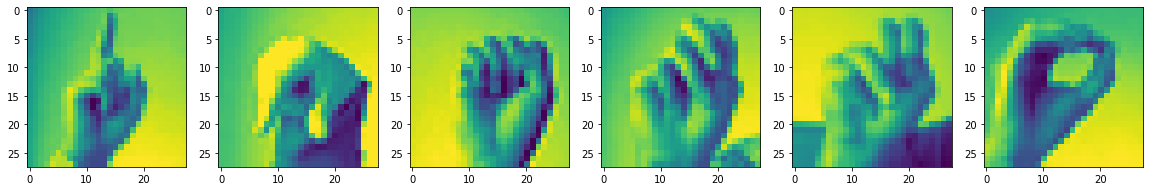

In [5]:
f = plt.figure(figsize=(20,6))
ax = f.add_subplot(161)
ax2 = f.add_subplot(162)
ax3 = f.add_subplot(163)
ax4 = f.add_subplot(164)
ax5 = f.add_subplot(165)
ax6 = f.add_subplot(166)
ax.imshow(traindata.iloc[0].values[1:].reshape(28,28))
ax2.imshow(traindata.iloc[5].values[1:].reshape(28,28))
ax3.imshow(traindata.iloc[20].values[1:].reshape(28,28))
ax4.imshow(traindata.iloc[456].values[1:].reshape(28,28))
ax5.imshow(traindata.iloc[999].values[1:].reshape(28,28))
ax6.imshow(traindata.iloc[1500].values[1:].reshape(28,28))
plt.show()

In [6]:
trainlabel=traindata['label'].values
traindata.drop('label',inplace=True,axis=1)
trainimages = traindata.values
#reshape it to (28,28,1)-> (height,width,channels)
trainimages=trainimages.reshape(-1,28,28,1)

In [7]:
testdata = pd.read_csv('sign_mnist_test.csv')

In [8]:
testlabel=testdata['label'].values
testdata.drop('label',inplace=True,axis=1)
testimages = testdata.values
testimages=testimages.reshape(-1,28,28,1)

In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
traingen=ImageDataGenerator(rotation_range=20,
                            zoom_range=0.1,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.1,
                            horizontal_flip=True,
                            rescale=1/255.0,#normalising the data
                            validation_split=0.2 #train_val split
                            )

In [11]:
traindata_generator = traingen.flow(trainimages,trainlabel,subset='training')
validationdata_generator = traingen.flow(trainimages,trainlabel,subset='validation')

In [12]:
testgen=ImageDataGenerator(rescale=1/255.0)

In [13]:
testdata_generator = testgen.flow(testimages,testlabel)

In [14]:
model=Sequential([])

model.add(Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(26,activation="softmax"))



In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                        

In [16]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [17]:
# Define a Callback class that stops training once accuracy reaches 99.5%
class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True
callback=myCallback()

In [18]:
dynamicrate = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

In [19]:
history=model.fit(traindata_generator,epochs=50,validation_data=validationdata_generator,callbacks=[callback,dynamicrate])

Epoch 1/50
687/687 [==============================] - 48s 65ms/step - loss: 0.8905 - accuracy: 0.7243 - val_loss: 0.5526 - val_accuracy: 0.8235 - lr: 0.0010
Epoch 2/50
687/687 [==============================] - 48s 70ms/step - loss: 0.2170 - accuracy: 0.9321 - val_loss: 0.2621 - val_accuracy: 0.9155 - lr: 9.5000e-04
Epoch 3/50
687/687 [==============================] - 49s 71ms/step - loss: 0.1203 - accuracy: 0.9628 - val_loss: 0.1101 - val_accuracy: 0.9643 - lr: 9.0250e-04
Epoch 4/50
687/687 [==============================] - 50s 72ms/step - loss: 0.0826 - accuracy: 0.9752 - val_loss: 0.1641 - val_accuracy: 0.9454 - lr: 8.5737e-04
Epoch 5/50
687/687 [==============================] - 52s 76ms/step - loss: 0.0684 - accuracy: 0.9788 - val_loss: 0.0527 - val_accuracy: 0.9831 - lr: 8.1451e-04
Epoch 6/50
687/687 [==============================] - 53s 77ms/step - loss: 0.0590 - accuracy: 0.9813 - val_loss: 0.0592 - val_accuracy: 0.9794 - lr: 7.7378e-04
Epoch 7/50
687/687 [==================

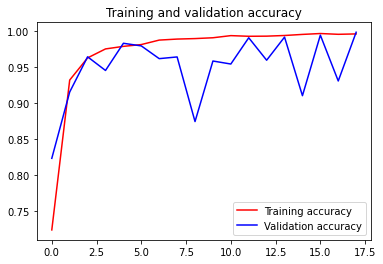

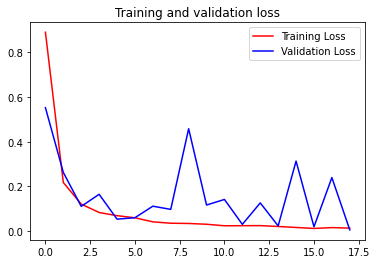

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [25]:
loss,accuracy = model.evaluate(testdata_generator)

225/225 [==============================] - 3s 13ms/step - loss: 8.9145e-04 - accuracy: 1.0000


In [23]:
print("test accuracy: "+ str(accuracy*100))

test accuracy: 100.0


In [26]:
import pickle

# save model
with open('handges.pkl','wb') as f:
    pickle.dump(history,f)

INFO:tensorflow:Assets written to: ram://e4370eb9-79b9-4804-8d9a-c549cfd12587/assets


In [27]:
import pickle 

#save model
hg = 'cnn_model.sav'
pickle.dump(model,open(hg,'wb'))


INFO:tensorflow:Assets written to: ram://ae914604-48ad-41bd-95a6-6d4e0915bf7c/assets


In [28]:
import keras 

#save a keras model
model.save("dm_proj.h5")
print("saved to disk")

saved to disk
